In [3]:
## import library 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import joblib

In [4]:
fc_data =pd.read_csv("D:/Lecture file/25 th lecture 29 march/10. Random Forests/Fraud_check.csv")
fc_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
fc_data.shape

(600, 6)

In [6]:
## data cleaning process 
fc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [8]:
tax_income =[]
for income in fc_data['Taxable.Income']:
    if income <= 30000 :
        tax_income.append("Risky")
    else:
        tax_income.append("Good")
fc_data['tax_income'] = tax_income
fc_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [13]:
fc_data_drop = fc_data.drop(columns=['Taxable.Income'])
fc_data_drop

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [15]:
fc_data_drop.isnull().sum()

Undergrad          0
Marital.Status     0
City.Population    0
Work.Experience    0
Urban              0
tax_income         0
dtype: int64

In [18]:
categories_data = fc_data_drop.select_dtypes(include ='object')
categories_data

,Undergrad,Marital.Status,Urban,tax_income
0,NO,Single,YES,Good
1,YES,Divorced,YES,Good
2,NO,Married,YES,Good
3,YES,Single,YES,Good
4,NO,Married,NO,Good
...,...,...,...,...
595,YES,Divorced,YES,Good
596,YES,Divorced,YES,Good
597,NO,Divorced,YES,Good
598,YES,Married,NO,Good


In [20]:
le = LabelEncoder()
fc_data_enocode = fc_data_drop.copy()

for col in categories_data :
    fc_data_enocode[col] =le.fit_transform(fc_data_enocode[col])


In [22]:
fc_data_enocode

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [24]:
## assiging value to variable
X =fc_data_enocode.iloc[:,0:5]
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [26]:
y =fc_data_enocode.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: tax_income, Length: 600, dtype: int32

In [28]:
## importing Random forrest libarary
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score


In [29]:
Rf_fc_data = RandomForestClassifier(criterion='entropy') 

In [30]:
Rf_fc_data.fit(X, y)

RandomForestClassifier(criterion='entropy')

In [33]:
fc_data_predict = Rf_fc_data.predict(X)
fc_data_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
accuracy =accuracy_score(y,fc_data_predict)*100
print(f'Accuracy of the fraud check data is : {accuracy} %')

Accuracy of the fraud check data is : 100.0 %


In [35]:
cm_data =confusion_matrix(y,fc_data_predict )
cm_data

array([[476,   0],
       [  0, 124]], dtype=int64)

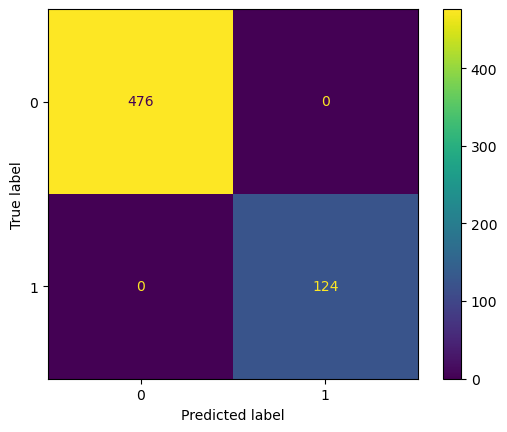

In [37]:
cd = ConfusionMatrixDisplay(cm_data,display_labels=Rf_fc_data.classes_)
cd.plot()
plt.savefig('D:/confusion matrix.png')

In [41]:
### saving the model

In [44]:
joblib.dump(Rf_fc_data,'fraud_check_RD_v1.joblib')

['fraud_check_RD_v1.joblib']